# **Workshop #2 Worksheet**

Welcome to Workshop #2! We will learn and explore Sequence Alignment in this workshop.

In the upcoming exercises, we've tried to be less explicit in our instructions to help you practise your problem-solving skills. Please reach out to your tutor or the answer sheet if you run into any difficulties. 

Also, feel free to add code cells to your worksheet as you work.

Unless otherwise indicated as exercises, the code cells in this worksheet are illustrative examples which you can run.

---

# **Section A. Revision** 
In workshop 1, we have learnt how to computationally present the sequence information of nucleotides, the following section is for you to recall the knowledge and practise them again before we move on to our new content. 

## **A.1) Install and check libraries**
Suppose you have already finished all provided materials from the workshop 1, your computer should be ready to go. But if you forget or are new to this:

Please firstly open your command line interface, by clicking "Windows - cmd";<br>
then type "pip install biopython" or "conda install biopython";<br>
after all the processes, type "pip list" or "conda list" to check if the target package has been successfully installed. You should see this:

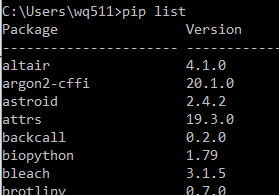

**Here again attached the documentation for Biopython:** https://biopython.org/wiki/Documentation

We also need some other libraries in this workshop, so run the following cell to ensure all packages are installed.

In [ ]:
# Set Up the Libraries.
import Bio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter 
import math
import itertools

## **A.2) Practice Questions**

### **Q1.** Sequence as String
To study the origin of COVID, our scientists have performed PCR to determine the DNA sequence of the virus. Here is a part of the result, could you help scientists to find the complementary sequence for further analysis? 

ATACCCTTCGCGCGCCGGACCGGGGTCCGCAAGGCGCGGCGGTGCACAAGCAATTGACAACTAACCACCGTGTATTCGTTATGGCACCAGGGAGTTTAAGCCGAGTCAATGGAGCTCGCAATACAGAGTTTACCGCATCTTGCCCTAACTGACAAACTGTGATCGACCACAAGCCAAGCCATTGCCTCTTAGACACGC

**Step 1.** Store the long sequence into a simple variable.

In [ ]:
from Bio.Seq import Seq
# Type your answer here (the 3' 5' polarity does not matter here)

**Step 2.** Find the complementary sequence.

In [ ]:
# Type your answer here

### **Q2.** Counting
Now scientists want to understand some biochemical properties of the complementary string, such as the GC ratio. Please help scientists to count the GC ratio in the complementary sequence. 

In [ ]:
# Type your answer here

### **Q3.** Translation
Could you try to directly translate the complementary sequence into amino acids? 

In [ ]:
# Type your answer here (Ignore any error warning)

Recall that there are several sequencing technologies that are used in real life, such as Illumina and PacBio. They usually store sequences in particular files, e.g. FASTA, FASTQ.

---

# **Section B. Pairwise Alignment**
In this section, we will focus on how to align two sequences together (Pairwise Alignment), in terms of:
* Terminology
* Types
    * Global Alignment
    * Local Alignment
* Quality evaluation
    * Simple Scoring System
    * Scoring Matrix

## **B.1) Terminology**

Imagine that you have been asked to investigate the origin of an unknown virus, what you probably want to know first is the biological sequence of the virus.


Imagine that you just obtained a new sequence from the lab and want to compare it with a previously obtained sequence in the database.
We usually call the new sequence **'Query'** and the stored one **'Reference'**.<br>

When we are performing the alignments, there are several possible situations, such as **Match**, **Mismatch**, **Deletion**, **Insertion**. The result of deletion and insertion is similar when we first judge the alignment result, so we group them together as **INDEL**. An example is shown below:

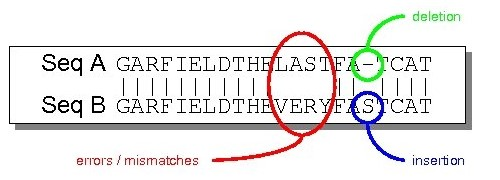

### **Q4.** Match and Mismatch
Given two short sequences: <br>
A: A-TGCTTCAACCT <br>
B: ACTGC-CCACCTT <br>
Assume that they can be aligned from end to end. <br>
Can you write a loop to return how many matches and mismatches there are when you align these two sequences together?

In [ ]:
seq1 = Seq('A-TG-ATCA-CCT')
seq2 = Seq('ACTGC-C-A-CTT')
# Type your answer here (should give 8 matches and 5 mismatches)

### **Q5.** Insertion and Deletion

Given two short sequences: <br>
A: A-TG-ATCA-CCT <br>
B: ACTGC-C-A-CTT <br>
Assume that they can be aligned from the end to end. <br>
Can you write a loop to return how many INDEL's there are when you align these two sequences together?

In [ ]:
seq1 = Seq('A-TG-ATCA-CCT')
seq2 = Seq('ACTGC-C-A-CTT')
# Type your answer here (Should give 5 INDEL's)

## **B.2）Alignment Score**

### **Q6.** Alignment Score

Assume we set the alignment scores as:
* Match = 1
* Mismatch = 0
* INDEL = 0

Calculate the final alignment score of the following sequence, recall that you can use a dictionary to store the Score:<br>
A: A-TG-ATCA-CCT-CCTTACGGT- <br>
B: ACTGC-C-A-CTTCCCTAAGGCTA <br>

In [ ]:
seq1 = Seq('A-TG-ATCA-CCT-CCTTACGGT-')
seq2 = Seq('ACTGC-C-A-CTTCCCTAAGGCTA')
# Type your answer here (Should give 13)

### **Q7.** Gap Penalty 

Assume we have another scoring system as:
* Match = 0
* Mismatch = 1
* INDEL = 5

Calculate the final alignment score of the following sequence:<br>
A: A-TG-ATCA-CCT-CCTTACGGT- <br>
B: ACTGC-C-A-CTTCCCTAAGGCTA <br>

In [ ]:
seq1 = Seq('A-TG-ATCA-CCT-CCTTACGGT-')
seq2 = Seq('ACTGC-C-A-CTTCCCTAAGGCTA')
# Type your answer here (Should give 35)

You may have noticed we appreciate a high score in Q6 and a low score in Q7, either way is acceptable when scoring alignments. They are used in different algorithms. However, the minimum score is often seen due to the logic 'to penalise mistakes'. As gaps are not welcomed biologically, we often give large penalty to gaps, that is shown in Q7. More advanced scoring system will even penalise 'gap opening' to obtain a better solution, but we won't go into detail about that here. An example is shown below:

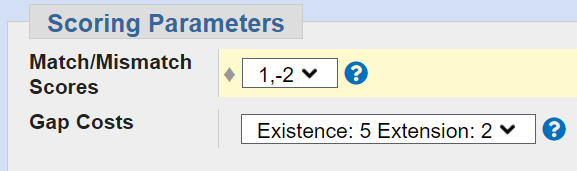

## **B.3) Scoring Matrix**

Besides gap penalty, a more popular scoring system is called scoring matrix. They are used to determine how similar two amino acids are. Different to nucleotides, amino acids can be translated by different codons, therefore, even if we have two Alanine, they might have different biological meanings. So by using a scoring matrix, we can determine the likelihood of one amino acid being at the same position in the sequence as another amino acid.

There are several types of matrix, such as **PAM - x** and **BLOSUM - x**. 
x number in PAM is lower for similar sequences; but higher for BLOSUM. For example, if you want to compare two similar sequences, you may choose PAM1 or BLOSUM99.
Here is one picture showing BLOSUM62 matrix:
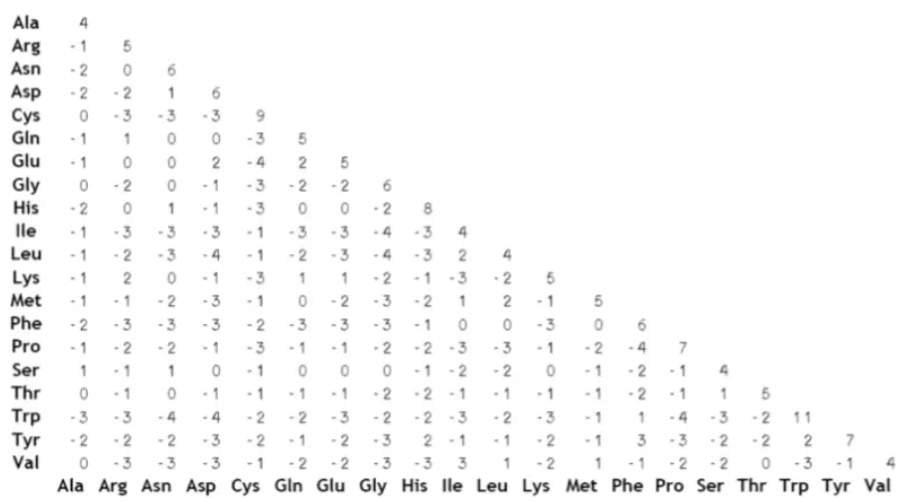

A high score indicates there are more natural mutations between these two amino acids, which means, it is more acceptable. 
A negative score means the two amino acids are not similar.

## **B.4) Alignment Types**

In all of the previous questions, we say 'assume they can be aligned from end to end'. In another word, we allow gaps at the end. This method is called **Global Alignment**. There are several algorithms to perform Global Alignment, such as **Needleman-Wunsch** and **Levenshtein**.

Global alignment works fine for two sequences with similar length, but if we have a query that is 100bp and a reference that is 100000000bp, can we still use this method?

Obviously, we can still introduce several gaps but the penalty will be huge as the result. To obtain a better score, we need a new method:<br>
If we do not allow gaps at the end, which means, we assume the query sequence is just a part of the reference, we will call this method a **Local Alignment**. The following picture demonstrates the difference.

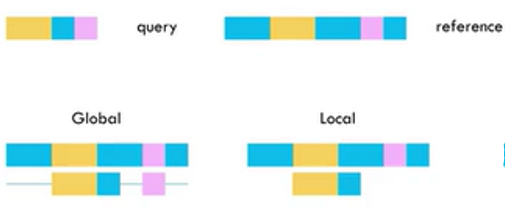

A commonly used Local alignment algorithm is **Smith-Waterman**. A practical tool you will explore here is called **BLAST (Basic Local Alignment Search Tool)**.

### **Q8.** BLAST

Everybody here must be sick of lockdown and tired of COVID, but let's use it for something useful and demonstrate how to use the BLAST tool as a bioinformatician.

**Step 1.** You can simply find some COVID-19 sequences from the NCBI database. Could you investigate the following website and download a sequence file of the "ORF1ab" gene, which produces the protein "3C-like proteinase" at "SAR-8" locus? <br>
Hint: You have to view the gene sequence first and download the FASTA file.

https://www.viprbrc.org/brc/viprStrainDetails.spg?ncbiAccession=MN908947&decorator=corona

**Step 2.**. NCBI provides us a handy tool for BLAST alignment. Navigate to the following link and decide which BLAST tool we should use, if we are planning to compare the downloaded sequence to the database? 
Hint: We are comparing DNA sequence to DNA sequence database.

https://blast.ncbi.nlm.nih.gov/Blast.cgi

**Step 3.** Once you have found the correct BLAST tool, click it and upload the downloaded file, DO NOT change any other parameters, they are out of scope here. Run the BLAST and wait for the result. 
Hint: It may take a while to search due to the large size of NCBI database.

After it runs, you should be able to see something like this:

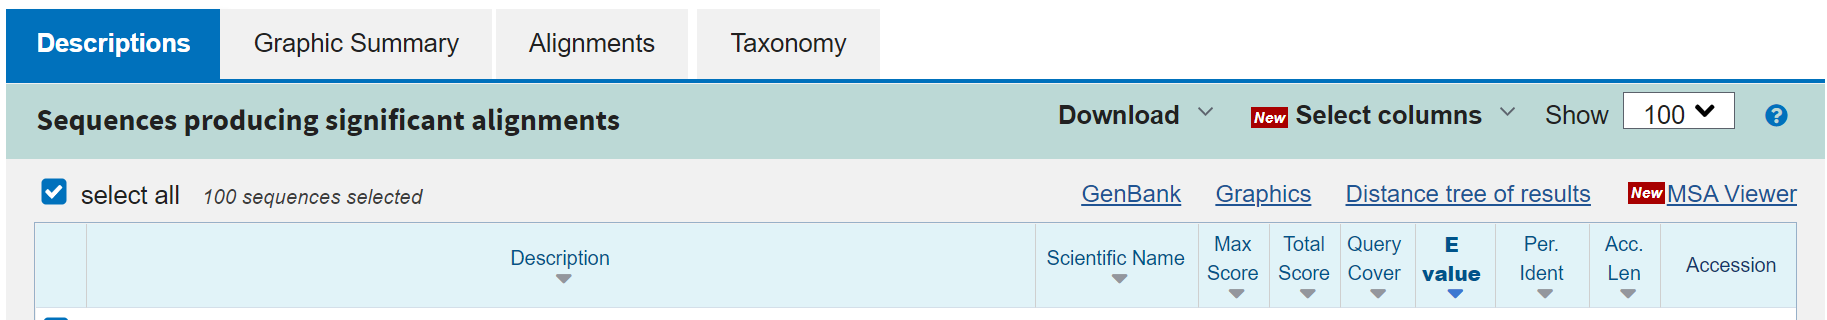

Now you can try to check which is the best result after alignments. Notice that, we have downloaded the sequence from the database and align it back into the database, so the results should be 100% match and the E-value should be 0 (perfect match). This is just a demonstration of how BLAST is usually used, the query sequence we put in the tool is often novel and unknown, so that BLAST can help us to identify the similarity and provide more useful information.  

## **B.5) Dynamic Programming**

All of the algorithms that we introduced above are classified as **Dynamic Programming**. It is a advanced and handy logic to solve Optimal questions.

The details of dynamic programming is far beyond our workshop scope, but here I will show you an easy example as demonstration. If you are curious about how it works and how it is designed, plenty of Youtube videos are quite helpful: https://www.youtube.com/watch?v=oBt53YbR9Kk

**Global Alignment - Smith-Waterman algorithm (Out of scope):**  

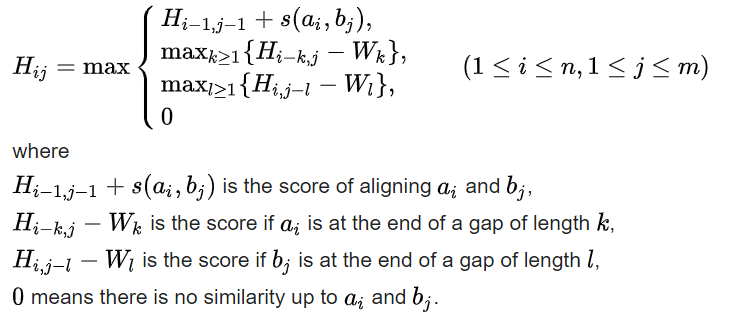

---

# **Section C. Multiple Sequence Alignment (MSA)**

In this section, we will focus on how to align several sequences together (Multiple Sequence Alignment), in terms of:
* Algorithms
* Tools
    * Biopython
    * ClustalOmega

Aligning multiple sequences highlights areas of similarity which may be associated with specific features that have been more highly conserved than other regions. These regions in turn can help classify sequences or inform experimental design. 

Multiple sequence alignment is also an important step for phylogenetic analysis, which aims to model the substitutions that have occurred over evolution and derive the evolutionary relationships between sequences. 

## **C.1) Algorithms**

There are several developed algorithms and related tools that are available for bioinformaticians to perform MSA easily.

**Progressive - ClustalW**

Progressive alignment builds up a final MSA by combining pairwise alignments beginning with the most similar pair and progressing to the most distantly related. All progressive alignment methods require two stages: a first stage in which the relationships between the sequences are represented as a tree, called a guide tree, and a second step in which the MSA is built by adding the sequences sequentially to the growing MSA according to the guide tree.

**Iterative - MUSCLE**

A set of methods to produce MSAs while reducing the errors inherent in progressive methods are classified as "iterative" because they work similarly to progressive methods but repeatedly realign the initial sequences as well as adding new sequences to the growing MSA.

**Hidden Markov models**

Hidden Markov models are probabilistic models that can assign likelihoods to all possible combinations of gaps, matches, and mismatches to determine the most likely MSA or set of possible MSAs.

## **C.2) In Biopython**

Biopython again provides us some usful tools to deal with multiple sequences, here I will introduce some basic methods so you can carry them on to the next workshop.

In [ ]:
# Do NOT run this line if you dont want to read a long long document
# Do run the line to see all related functions, methods and applications of AlignIO - a handy MSA tool in Biopython
help(AlignIO)

In [ ]:
# If your file contains a single sequence (Do Not run)
from Bio import AlignIO
alignments = AlignIO.read("Your File Name", "fasta")
alignment

In [ ]:
# If your file contains multiple sequences (Do Not Run)
from Bio import AlignIO
alignments = AlignIO.parse("Your File Name", "phylip")
for alignment in alignments:
    print(alignment)

We’ve talked about using Bio.AlignIO.read() and Bio.AlignIO.parse() for alignment input (reading
files), and now we’ll look at Bio.AlignIO.write() which is for alignment output (writing files). This is a
function taking three arguments: some MultipleSeqAlignment objects (or for backwards compatibility the
obsolete Alignment objects), a handle or filename to write to, and a sequence format.
Here is an example, where we start by creating a few MultipleSeqAlignment objects the hard way (by
hand, rather than by loading them from a file). Note we create some SeqRecord objects to construct the
alignment from.

In [ ]:
>>> from Bio.Seq import Seq
>>> from Bio.SeqRecord import SeqRecord
>>> from Bio.Align import MultipleSeqAlignment
>>> align1 = MultipleSeqAlignment(
... [
... SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
... SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
... SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
... ]
... )
>>> align2 = MultipleSeqAlignment(
... [
... SeqRecord(Seq("GTCAGC-AG"), id="Delta"),
... SeqRecord(Seq("GACAGCTAG"), id="Epsilon"),
... SeqRecord(Seq("GTCAGCTAG"), id="Zeta"),
... ]
... )
>>> align3 = MultipleSeqAlignment(
... [
... SeqRecord(Seq("ACTAGTACAGCTG"), id="Eta"),
... SeqRecord(Seq("ACTAGTACAGCT-"), id="Theta"),
... SeqRecord(Seq("-CTACTACAGGTG"), id="Iota"),
... ]
... )
>>> my_alignments = [align1, align2, align3]

from Bio import AlignIO
AlignIO.write(my_alignments, "my_example.phy", "phylip")

Now we have a list of Alignment objects, and we’have writen them to a PHYLIP format file. <br>
Open the file in your txt editor and you can see this:

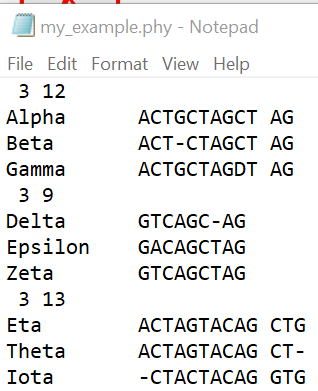

## **C.3) In Online tool - ClustalOmega**

Clustal Omega improves on ClustalW in a number of ways - alignment accuracy and improved scaling to many sequences are the main results. 

The Clustal Omega multiple sequence alignment web form is available at http://www.ebi.ac.uk/Tools/msa/clustalo/. There are two ways to use this service at EMBL-EBI. The first is interactively (default) and the second is by email. Using it interactively, the user must wait for the results to be displayed in the browser window. The email option means that the results will not be displayed in the browser window but instead a link to the results will be sent by email. The email option is the better one to take when submitting large amounts of data or a job that might take a long time to run. 

For more detailed help for using Clustal Omega please see the tool help documentation http://www.ebi.ac.uk/Tools/msa/clustalo/help/index.html. 

# **Section D. Challenge - Alignment**

To solve a pairwise alignment problem, we write them in the following form and assign values to each possibility, as shown in the picture below. The value is related to the designed scoring system. 

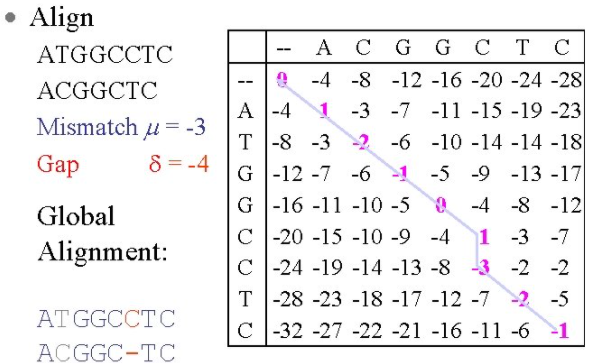

Starting at the top left, our aim is to get to the bottom right but maximise our score. For travelling along certain edges, we will accumulate points. Our input will be a matrix which contains the scores we get from moving from node(i,j) to node(i+1, j) or node(i,j+1). The source node is assigned node(0,0) and the sink node is node(n,m). 

For example if we have a 2x2 grid, i.e. n=2, m=2, then we have 

(0,0)->(0,1)->(0,2)

(1,0)->(1,1)->(1,2)

(2,0)->(2,1)->(2,2)

So we have 9 possible states: 3 rows, and 3 columns, in general we have n+1 rows and m+1 columns 

Number of possible paths, 
No matter what path we take, we need to make a total number of n+m decisions. Each time we make a decision we could make two possible choices, go down or go right. However, note that in order to each our destination we need to make exactly m rights, and n downs. Hence this reduces to a combinatorial problem of given n+m choices, how many ways can I pick n or m?

$$ nCr(n,k) = \frac{n!}{k!(n-k)!} $$ 

In [ ]:
import math
n = 16+12
k = 16 

math.factorial(n)/((math.factorial(k))*(math.factorial(n-k)))

Now sequence alignment is actually equivalent of finding the longest path through a grid. 
Whether we specify a match, mismatch, insertion or deletion actually corresponds to the possible path choices we could make. We call this 'manhattan grid' for sequence alignment an **alignment graph**. 

*AlignmentGraph(v,w)* every possible path through this graph can represent a possible alignment between two strings. In our alignment graph, we will have additional diagonal edges which will correspond to matches. If we assign +1 to all these edges, then to maximise matches will be to travel the longest path in this alignment graph. 

To solve this we need to use dynamic programming. 

We first observe that computing the edge paths are easy since we know exactly where we came from. 

i.e. s(0,j) is just the sum of the first j horizontal edges, similarly s(i,0) is just the sum of the first i vertical edges. 

Now we have computed s(0,1) and s(1,0), we have all the information we need to compute s(1,1). This is just going to be the maximum of the two. 

In general, 
$$s_{i,j} = max(s_{i-1,j}, s_{i,j-1})$$

After computing s(1,1) we can fill out the column for the remaining s(1,j). We repeat this process until all columns are filled out and we have reached s(n,m). 

For each node we highlight the edge that led us to that node. If there is a tie, we highlight both edges. 


In [ ]:
# ManhattanTourist(n, m, Down, Right)
#     s0, 0 ← 0
#     for i ← 1 to n
#         si, 0 ← si-1, 0 + downi-1, 0
#     for j ← 1 to m
#         s0, j ← s0, j−1 + right0, j-1
#     for i ← 1 to n
#         for j ← 1 to m
#             si, j ← max{si - 1, j + downi-1, j, si, j - 1 + righti, j-1}
#     return sn, m

In [ ]:
import numpy as np
def ManhattanTourist(n, m, Down, Right):
    # intialise the matrix 
    
    # set start point  (0,0) ← 0
    
    # calculate (1,0), (2,0) ... (n,0) with vertical edges specified by the Down matrix
    # i.e. Down(0,0) specifies going from (0,0)->(1,0)
    # Down(1,0) specifies going from (1,0)->(2,0) etc. 
        
    # calculate the horizontal edges i.e. (0,1), (0,2), ...(0, m)
    # Similarly Right(0,0) species going from (0,0)->(0,1) 
    # Right(1,0) specifies going from (0,1)->(0,2)
        
    # iterate through remaining part of matrix (rows 1 to n, columns 1 to m) 


In [ ]:
# Test your code 
n = 4
m = 4
Down = [[1, 0, 2, 4, 3],
        [4, 6, 5, 2, 1],
        [4, 4, 5, 2, 1],
        [5, 6, 8, 5, 3]]

Right = [[3, 2, 4, 0],
         [3, 2, 4, 2],
         [0, 7, 3, 3],
         [3, 3, 0, 2],
         [1, 3, 2, 2]]

ManhattanTourist(n, m, Down, Right) # answer = 34 

Now let us add in diagonal edges, modify your code from ManhattanTourist to allow for the movement between (0,0)->(1,1) or in general (i,j)->(i+1,j+1)

In [ ]:
def ManhattanTourist(n, m, Down, Right, Diag):
    # intialise the matrix 
    
    # set start point  (0,0) ← 0
    
    # calculate (1,0), (2,0) ... (n,0) with vertical edges specified by the Down matrix
    # i.e. Down(0,0) specifies going from (0,0)->(1,0)
    # Down(1,0) specifies going from (1,0)->(2,0) etc. 
        
    # calculate the horizontal edges i.e. (0,1), (0,2), ...(0, m)
    # Similarly Right(0,0) species going from (0,0)->(0,1) 
    # Right(1,0) specifies going from (0,1)->(0,2)
        
    # iterate through remaining part of matrix (rows 1 to n, columns 1 to m)       
    # You need to change the logic in this step 

In [ ]:
# Test your code 
n = 4
m = 4
Down = [[1, 0, 2, 4, 3],
        [4, 6, 5, 2, 1],
        [4, 4, 5, 2, 1],
        [5, 6, 8, 5, 3]]

Right = [[3, 2, 4, 0],
         [3, 2, 4, 2],
         [0, 7, 3, 3],
         [3, 3, 0, 2],
         [1, 3, 2, 2]]

Diag = [[5, 0, 2, 1],
        [8, 4, 3, 0],
        [10, 8, 9, 5],
        [5, 6, 4, 7]]

ManhattanTourist(n, m, Down, Right, Diag) # answer = 35 

To set up the problem now for sequence alignment, we just assign diagonal edges corresponding to actual matches between the two sequences a weight of 1. The remaining edges will be 0. In practice, various alignment applications are much more complex. They require us to build a DAG with appropriately chosen edge weights in order to model the specifics of the biological problem. 


So far we have managed to find the longest distance but we also want to know the exact path we took. Modify the algorithm so that whilst you are computing the state of a cell, you store the edge that was taken. If there was a tie you can highlight both edges. 

In [ ]:
def ManhattanTourist(n, m, Down, Right, Diag):
    # intialise the matrix 
    
    # construct a dictionary to help us remember the edges we took 
    
    # set start point  (0,0) ← 0
    
    # create the initial node starting point in the dictionary {node: edge_list}
    # edges will either be 0='DOWN', 1='RIGHT', 2='DIAG'
    
    # calculate (1,0), (2,0) ... (n,0) with vertical edges specified by the Down matrix
    # i.e. Down(0,0) specifies going from (0,0)->(1,0)
    # Down(1,0) specifies going from (1,0)->(2,0) etc. 
        
    # calculate the horizontal edges i.e. (0,1), (0,2), ...(0, m)
    # Similarly Right(0,0) species going from (0,0)->(0,1) 
    # Right(1,0) specifies going from (0,1)->(0,2)
        
    # iterate through remaining part of matrix (rows 1 to n, columns 1 to m) 
    # You need to change the logic in this step 
            
            # hint np.flatnonzero(list == np.max(list)) will return all the indices in a numpy array 
            # to convert numpy array to list use .tolist()

In [ ]:
# Test your code 
n = 4
m = 4
Down = [[1, 0, 2, 4, 3],
        [4, 6, 5, 2, 1],
        [4, 4, 5, 2, 1],
        [5, 6, 8, 5, 3]]

Right = [[3, 2, 4, 0],
         [3, 2, 4, 2],
         [0, 7, 3, 3],
         [3, 3, 0, 2],
         [1, 3, 2, 2]]

Diag = [[5, 0, 2, 1],
        [8, 4, 3, 0],
        [10, 8, 9, 5],
        [5, 6, 4, 7]]

dist, path_track = ManhattanTourist(n, m, Down, Right, Diag) # answer = 35 

In [ ]:
path_track

Now that we have this path matrix, let's go from sink and reconstruct a path back to source 

In [ ]:
def ReconstructPath(n, m, path_track):
    # intialise array to store the actions 

    # start from (n,m)
    
        # We can guarantee there is a unique path back

        # if we took the DOWN action
    
        # we took the RIGHT action
        
        # we took the DIAG action
        
ReconstructPath(4,4, path_track)

Given two arbitrary sequences, return their alignment graph

In [ ]:
seq1 = 'ACGTGTAC'
seq2 = 'ACTTGGGAA'

def CreateAlignmentGraph(seq1, seq2):
    n = len(seq1)
    m = len(seq2)
    
    Down = np.zeros((n, m+1))
    Right = np.zeros((n+1, m))
    Diag = np.zeros((n, m))
    
    # iterate through the diag matrix 
    # if the symbols for the sequences match in that position set the weight to 1
    for i in range(n):
        for j in range(m):
            if seq1[i] == seq2[j]:
                Diag[i][j] = 1
                
    return Down, Right, Diag

Down, Right, Diag = CreateAlignmentGraph(seq1, seq2)

In [ ]:
seq1 = 'ACGTGTAC'
seq2 = 'ACTTGGGAA'

def CreateAlignmentGraph(seq1, seq2, indel_penalty = 0, mismatch_penalty = 0):
    n = len(seq1)
    m = len(seq2)
    
    # initialise weights of edges 
    Down = np.zeros((n, m+1))
    Right = np.zeros((n+1, m))
    Diag = np.zeros((n, m))
    
    if indel_penalty > 0:
        Down -= indel_penalty
        Right -= indel_penalty
        
    
    # iterate through the diag matrix 
    # if the symbols for the sequences match in that position set the weight to 1
    for i in range(n):
        for j in range(m):
            if seq1[i] == seq2[j]:
                Diag[i][j] = 1
            else:
                Diag[i][j] -= mismatch_penalty
                
    return Down, Right, Diag

Down, Right, Diag = CreateAlignmentGraph(seq1, seq2)

Combine our previous functions together to create the global pairwise sequence alignment function. 

In [ ]:
def GlobalPairwiseAlign(seq1, seq2, indel_penalty = 0, mismatch_penalty = 0):
    n = len(seq1)
    m = len(seq2)
    Down, Right, Diag = CreateAlignmentGraph(seq1, seq2, indel_penalty = indel_penalty, 
                                             mismatch_penalty = mismatch_penalty)
    dist, path_track = ManhattanTourist(n, m, Down, Right, Diag)
    path = ReconstructPath(n,m, path_track)
    
    seq1_list = list(seq1)
    seq2_list = list(seq2)
    
    aligned_seq1 = ''
    aligned_seq2 = ''
    
    newline = 117
    for action in path: 
        if action =='DIAG':
            aligned_seq1 += seq1_list.pop(0)
            aligned_seq2 += seq2_list.pop(0)
        
        if action =='DOWN': # deletion
            aligned_seq1 += seq1_list.pop(0)
            aligned_seq2 += '-'
            
        if action =='RIGHT': # insertion
            aligned_seq1 += '-'
            aligned_seq2 += seq2_list.pop(0)
            
        # This is just purely for formatting purposes
        if len(aligned_seq1)%newline==0:
            aligned_seq1 += '\n'
            
        if len(aligned_seq2)%newline==0:
            aligned_seq2 += '\n'
            
    aligned_seq1 = aligned_seq1.split('\n')
    aligned_seq2 = aligned_seq2.split('\n')
    
    for i in range(len(aligned_seq1)):
        print(aligned_seq1[i])
        print(aligned_seq2[i])
        print()
            
    return (aligned_seq1, aligned_seq2)

seq1 = 'ACGTGGGGTAC'
seq2 = 'ACTTGGGAATC'

alignment = GlobalPairwiseAlign(seq1, seq2)

In [ ]:
seq1 = 'YAFDLGYTCMFPVLLGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLFHTIVNTASFAFDANFESLRLIVLGGEKIIPIDVIAFRKMGHTEFINHYGPTEATIGA'
seq2 = 'AFDVSAGDFARALLTGGQLIVCPNEVKMDPASLYAIIKKYDITIFEATPALVIPLMEYIYEQKLDISQLILIVGSDSCSMEDFKTLVSRFGSTIRIVNSYGVTEACIDS'

alignment = GlobalPairwiseAlign(seq1,seq2)

In [ ]:
alignment = GlobalPairwiseAlign(seq1, seq2, indel_penalty=2)

In [ ]:
alignment = GlobalPairwiseAlign(seq1, seq2, indel_penalty=2, mismatch_penalty=2)